Phần 1 : Thao tác cơ bản
B1: xác định số lượng yếu tố (Biến số) tham gia vào yêu cầu
B2: Thu thập dữ liệu (Data Colection)
B3: Tổng quan dữ liệu 
B4: xử lí cơ bản 

In [2]:
import pandas as pd
df = pd.read_csv('DataLT/dulieuxettuyendaihoc.csv', header = 0, delimiter = ',', encoding = 'utf-8')

In [3]:
df.head(5)

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSV                 100 non-null    object 
 1   T1                   100 non-null    float64
 2   T2                   100 non-null    float64
 3   T3                   100 non-null    float64
 4   T4                   100 non-null    float64
 5   T5                   100 non-null    float64
 6   T6                   100 non-null    float64
 7   GT                   100 non-null    object 
 8   DT                   3 non-null      float64
 9   KV                   100 non-null    object 
 10  NGONNGU              100 non-null    float64
 11  TOANLOGICPHANTICH    100 non-null    float64
 12  GIAIQUYETVANDE       100 non-null    float64
 13  KT                   100 non-null    object 
 14  NGAYTHI              100 non-null    object 
 15  DINHHUONGNGHENGHIEP  100 non-null    obje

In [5]:
df.rename(columns = {'TOANLOGICPHANTICH':'TOAN','GIAIQUYETVANDE':'KYNANG','DINHHUONGNGHENGHIEP':'HUONGNGHIEP'}, inplace = True)

In [6]:
df.head(5)

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOAN,KYNANG,KT,NGAYTHI,HUONGNGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No


In [7]:
df.dropna(how='all', inplace = True) # xoa du lieu rong

In [8]:
df.drop_duplicates(inplace = True) #xoa du lieu trung

In [9]:
import matplotlib.pyplot as plt #import thu vien matplotlib

In [10]:
import seaborn as sns #import seaborn

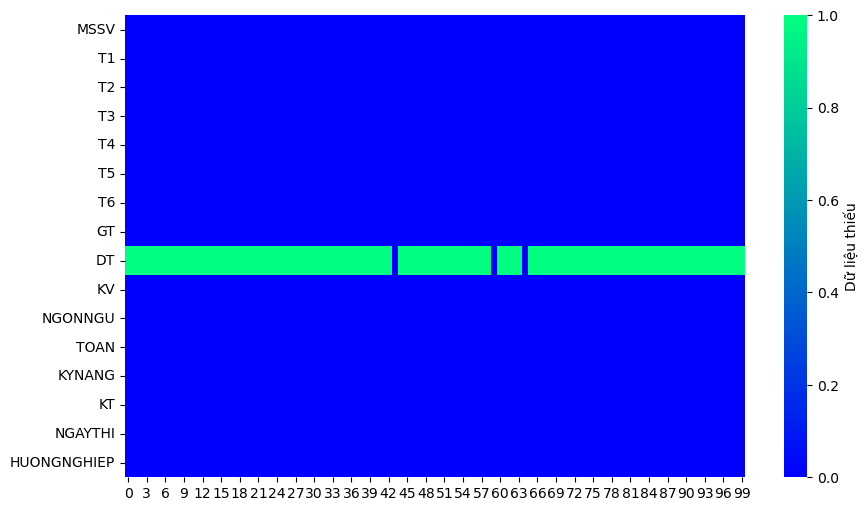

In [11]:
#truc quan hoa du lieu
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='winter', cbar_kws = {'label' : 'Dữ liệu thiếu'})
plt.savefig('missingdata.png', dpi = 100)
plt.show()

In [12]:
#dien gia tri thieu
df['DT'].fillna('KINH', inplace = True)
#df['DT'].fillna(df['DT'].mode =()[0], inplace = True)

In [13]:
#dien gia tri ngon ngu bi thieu = 0
df['NGONNGU'].fillna(0, inplace = True)

In [14]:
#dien gia tri thieu phan LOGIC bang trung binh
df['TOAN'].fillna(df['TOAN'].mean(), inplace = True)
#dien gia tri thieu phan UNGXU bang trung binh vi
df['KYNANG'].fillna(df['KYNANG'].median(), inplace = True)

Phần 2: Kỹ Thuật Feature Enginearing
(Thường dùng cho Machine Learning)
Nếu chỉ là xử lý phân tích dữ liệu thì ta gọi là New Attribute
Đây là kỹ thuật tạo thêm hoặc biến đổi số liệu có sẵn có thành các biến số mới phù hợp nghiệp vụ để phân tích
tạo thêm TBTOAN: lop 12


In [15]:
df['TBTOAN'] = (df['T5']+df['T6'])/2

In [16]:
df.head(10)

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOAN,KYNANG,KT,NGAYTHI,HUONGNGHIEP,TBTOAN
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,KINH,2NT,3.25,3.25,4.50,A1,12/7/2018,No,7.15
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,KINH,1,6.00,4.00,3.50,C,12/7/2018,Yes,3.50
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,KINH,1,5.00,6.75,4.00,C,12/7/2018,No,5.25
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,KINH,1,4.25,4.25,5.25,D1,12/7/2018,No,6.75
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,KINH,2NT,4.25,4.50,5.00,A,12/7/2018,No,7.40
5,SV006,9.3,9.6,7.1,8.5,8.5,7.8,M,KINH,1,1.50,4.00,6.00,D1,12/7/2018,No,8.15
6,SV007,2.8,4.4,4.6,4.7,5.4,5.3,F,KINH,2,6.50,6.75,5.25,C,12/7/2018,Yes,5.35
7,SV008,8.3,6.7,8.6,8.3,8.5,8.3,F,KINH,2,3.75,4.50,4.25,D1,12/7/2018,Yes,8.40
8,SV009,6.5,7.3,6.4,8.1,7.7,7.7,F,KINH,1,3.50,3.50,6.75,D1,12/7/2018,Yes,7.70
9,SV0010,7.3,8.0,6.5,5.5,7.5,6.9,F,KINH,1,4.00,4.75,5.50,D1,12/7/2018,Yes,7.20


In [17]:
#tao xep loai dua tren tb toan
df.loc[df['TBTOAN'] < 5.0, 'XEPLOAI'] = 'FAIL'
df.loc[(df['TBTOAN'] >= 5.0) & (df['TBTOAN'] < 7.0), 'XEPLOAI']= 'FAIR'
df.loc[(df['TBTOAN'] >= 7.0) & (df['TBTOAN'] < 9.0), 'XEPLOAI']= 'GOOD'
df.loc[df['TBTOAN'] >= 9.0, 'XEPLOAI']= 'EXCEL'

In [18]:
df.head(5)

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOAN,KYNANG,KT,NGAYTHI,HUONGNGHIEP,TBTOAN,XEPLOAI
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,KINH,2NT,3.25,3.25,4.50,A1,12/7/2018,No,7.15,GOOD
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,KINH,1,6.00,4.00,3.50,C,12/7/2018,Yes,3.50,FAIL
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,KINH,1,5.00,6.75,4.00,C,12/7/2018,No,5.25,FAIR
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,KINH,1,4.25,4.25,5.25,D1,12/7/2018,No,6.75,FAIR
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,KINH,2NT,4.25,4.50,5.00,A,12/7/2018,No,7.40,GOOD


tạo biến khối thi:NHOMKT thỏa mãn
A1: G1
C: G3
D1: G3
A: G1
B: G2

In [19]:
dict_map = {'A1':'G1', 'C':'G3', 'D1':'G3', 'A':'G1', 'B':'G2'}
df['NHOMKT'] = df['KT'].map(dict_map)

In [20]:
df.head(5)

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOAN,KYNANG,KT,NGAYTHI,HUONGNGHIEP,TBTOAN,XEPLOAI,NHOMKT
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,KINH,2NT,3.25,3.25,4.50,A1,12/7/2018,No,7.15,GOOD,G1
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,KINH,1,6.00,4.00,3.50,C,12/7/2018,Yes,3.50,FAIL,G3
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,KINH,1,5.00,6.75,4.00,C,12/7/2018,No,5.25,FAIR,G3
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,KINH,1,4.25,4.25,5.25,D1,12/7/2018,No,6.75,FAIR,G3
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,KINH,2NT,4.25,4.50,5.00,A,12/7/2018,No,7.40,GOOD,G1


In [21]:
#neu khoi thi thuoc G2, g1 va tbtoan >= 5.0 thì được cộng 1.0, ngược lại thì cộng = 0
def fplus(x,y):
    if(x == 'G1' or x=='G2') and (y >= 5.0):
        return 1.0
    else: 
        return 0.0
    


In [22]:
df['CONG'] = list(map(fplus, df['NHOMKT'], df['TBTOAN']))

In [23]:
df[['NHOMKT','TBTOAN','CONG']].head(5)

,NHOMKT,TBTOAN,CONG
0,G1,7.15,1.0
1,G3,3.50,0.0
2,G3,5.25,0.0
3,G3,6.75,0.0
4,G1,7.40,1.0


#Phần 3:
đá trực quan số dữ liệu ta cần lưu ý: mục đích, sự phối hợp giữa các loại biến để lựa chọn biểu đồ phù hợp điều kiện số liệu trực quan
Định tính: bar, pie
Định lượng: cratter, line, histogram, box-plot
Nguyên lý chọn biểu đồ: https://www.tapclicks.com/resources/blog/data-visualization-types/

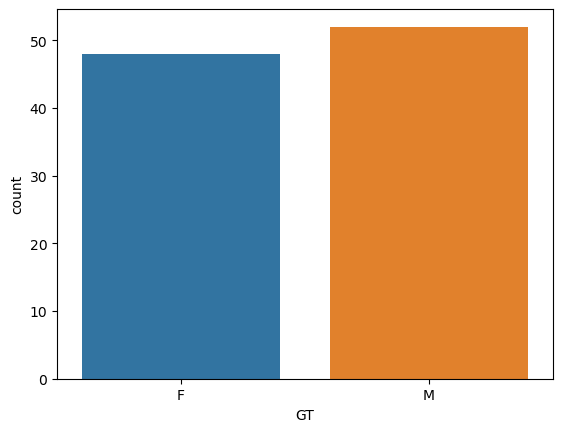

In [24]:
#hãy trực quan số lượng học sinh theo giới tính
sns.countplot(x='GT', data = df)
plt.show()

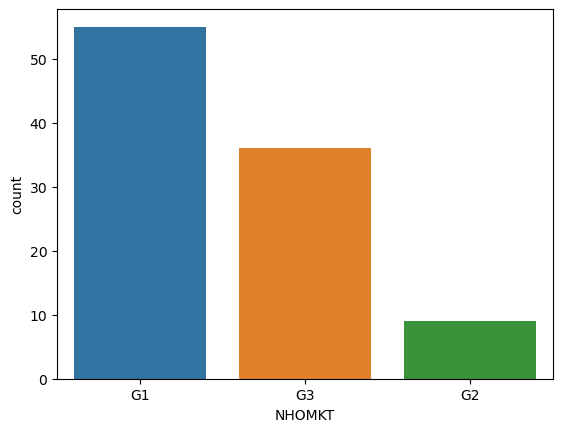

In [25]:
#hãy trực quan số lượng học sinh theo giới tính
sns.countplot(x='NHOMKT', data = df)
plt.show()

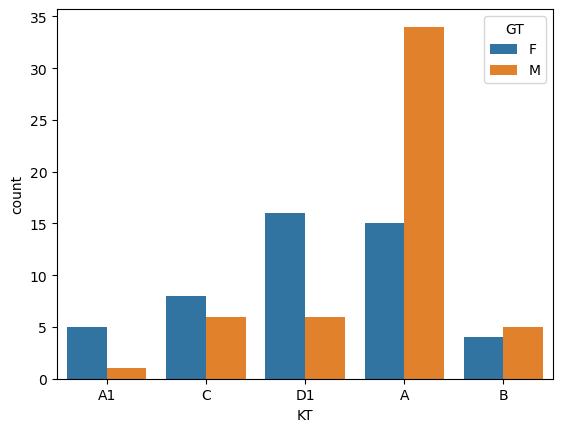

In [26]:
#hãy so sánh số lượng học sinh đăng ký khối thi dựa trên nhóm giới tính
sns.countplot(x='KT', hue='GT', data=df)
plt.show()

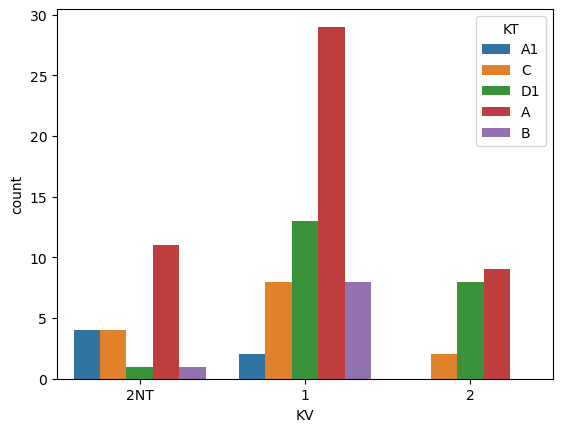

In [27]:
#hãy so sánh số lượng học sinh thuộc khu vực nào dựa trên nhóm Khối thi
sns.countplot(x='KV', hue='KT', data=df)
plt.show()

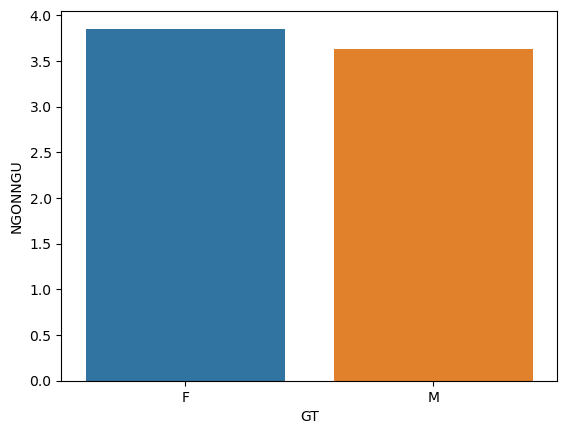

In [28]:
#hãy so sánh dtb ngôn ngữ theo nhóm gioi tính
sns.barplot(x='GT', y='NGONNGU', errorbar=None, data=df)
plt.show()

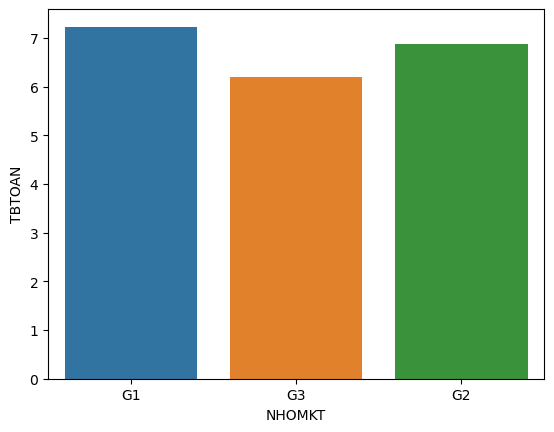

In [29]:
#hãy so sánh dtb LOGIC theo NHOMKT
sns.barplot(x='NHOMKT', y='TBTOAN', errorbar=None, data=df)
plt.show()

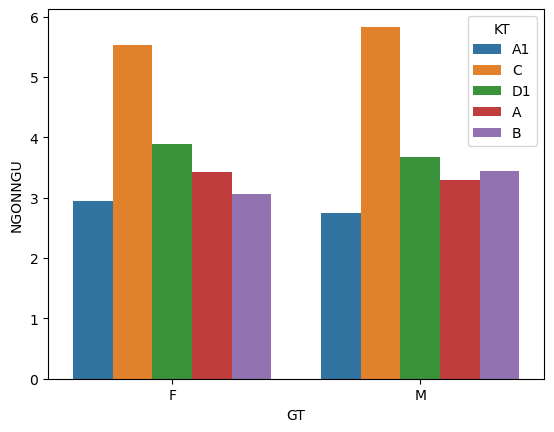

In [30]:
#so sánh điểm trung bình của NGONNGU theo nhóm GT dựa trên KT
sns.barplot(x='GT', y='NGONNGU', hue='KT' , errorbar=None, data=df)
plt.show()

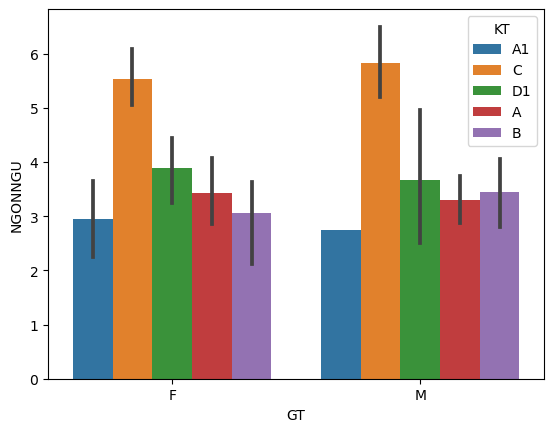

In [31]:
#so sánh điểm trung bình của NGONNGU theo nhóm GT dựa trên KT
#không có errorbar (độ sai số)
#thanh đen càng dài thì sai số càng cao
sns.barplot(x='GT', y='NGONNGU', hue='KT', data=df)
plt.show()

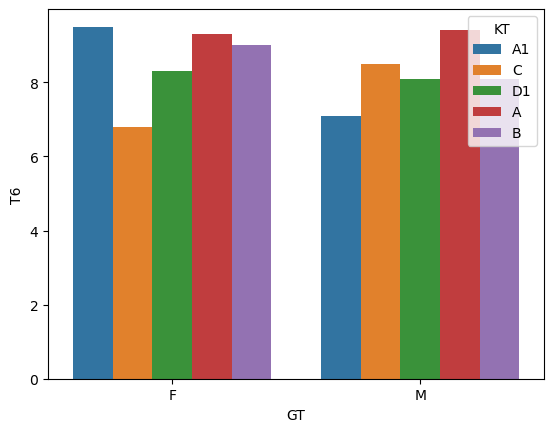

In [32]:
#so sánh điểm cao nhất của NGONNGU theo nhóm GT theo KT
#Lưu ý: không để estimator thì mặc định là mean

sns.barplot(x='GT', y='T6', hue='KT', data=df, errorbar=None, estimator=max)
plt.show()

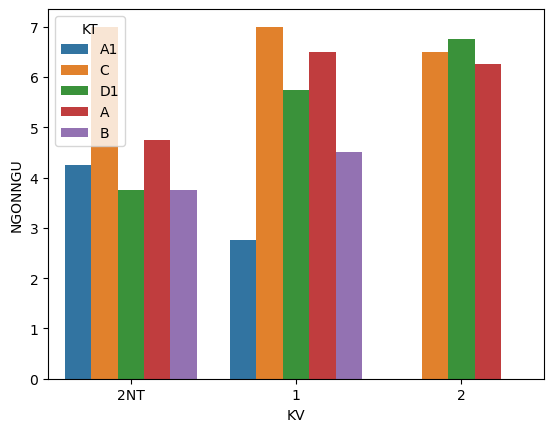

In [33]:
import numpy as np
#khi biến định  tính dùng làm nhóm tổng hợp
#Có nhiều hơn 2 giá trị hoặc có giá trị thiếu của điểm NGONNGU trên 
#Thì ta cần dùng hàm tổng hợp thông qua thư viện này
sns.barplot(x='KV', y='NGONNGU', hue='KT', data = df, 
            errorbar=None,estimator=np.max)
plt.show()

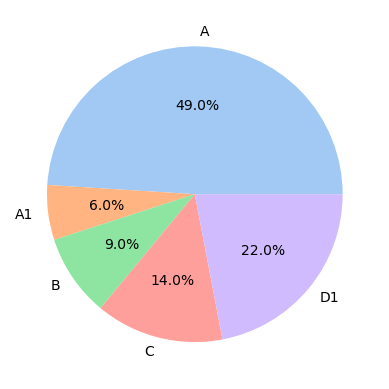

In [34]:
# Biểu đồ pie
# Mục đích: Trực quan dữ liệu theo nhóm tỉ lệ phần trăm
gb = df.groupby(['KT'])['KT'].agg(['count'])
labels = gb.index
data = list(gb['count'])
colors = sns.color_palette('pastel') #tao bang mau`
plt.pie(data, labels = labels, colors=colors, autopct='%1.1f%%')
plt.show()

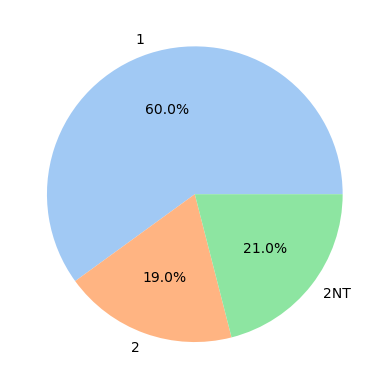

In [35]:
#Khu vực
gb = df.groupby(['KV'])['KV'].agg(['count'])
labels = gb.index
data = list(gb['count'])
colors = sns.color_palette('pastel') #tao bang mau`
plt.pie(data, labels = labels, colors=colors, autopct='%1.1f%%')
plt.show()

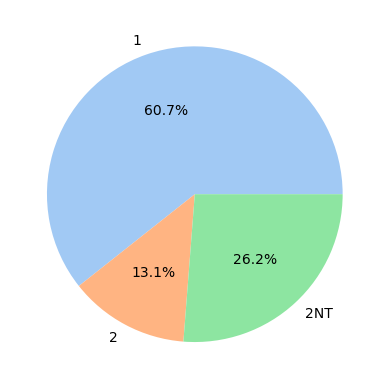

In [36]:
# Trực quan tỉ lệ phần trăm điểm cộng DIEMCONG trên từng nhóm KV

gb = df.groupby(['KV'])['CONG'].agg(['sum'])
labels = gb.index
data = list(gb['sum'])
colors = sns.color_palette('pastel') #tao bang mau`
plt.pie(data, labels = labels, colors=colors, autopct='%1.1f%%')
plt.show()

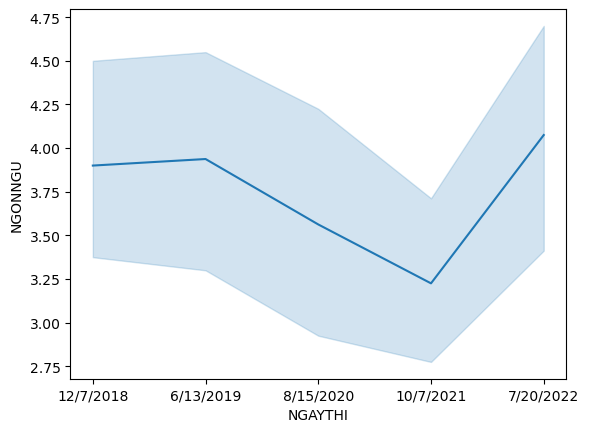

In [37]:
# Biểu đồ thường dùng để tổng hợp dữ liệu theo trục "Thời gian" hoặc "có thứ tự"
# VD: Tổng hợp trung bình điểm ngôn ngữ theo các năm thi

sns.lineplot(x='NGAYTHI', y='NGONNGU', data=df)
plt.show()

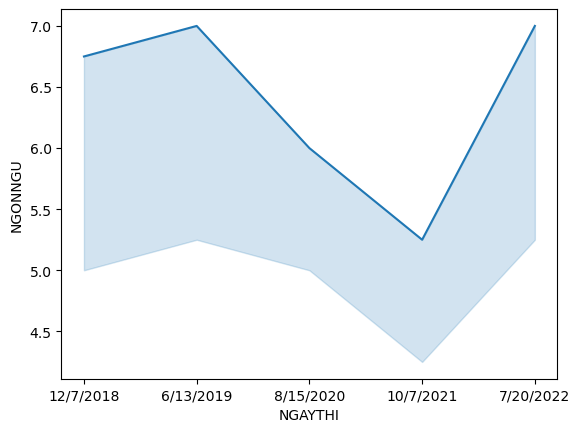

In [38]:
#Trực quan dữ liệu điểm NGONNGU lớn nhất dưạ trên Ngaythi 
# theo từng năm bằng biểu đồ line
# Lưu ý các hàm estimator đều dùng numpy (vd: estimator = np.max)
sns.lineplot(x='NGAYTHI', y='NGONNGU', data=df, estimator = np.max)
plt.show()

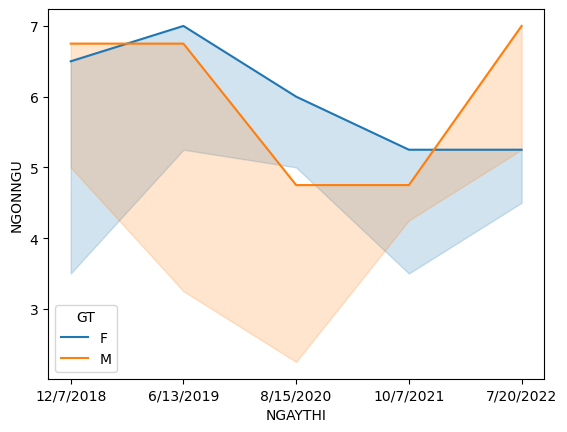

In [39]:
#Tổng hợp điểm NGONNGU lớn nhất theo các năm thi trên từng nhóm giới tính bằng
# biểu đồ line
sns.lineplot(x='NGAYTHI', y='NGONNGU', hue='GT' , data=df, estimator = np.max)
plt.show()

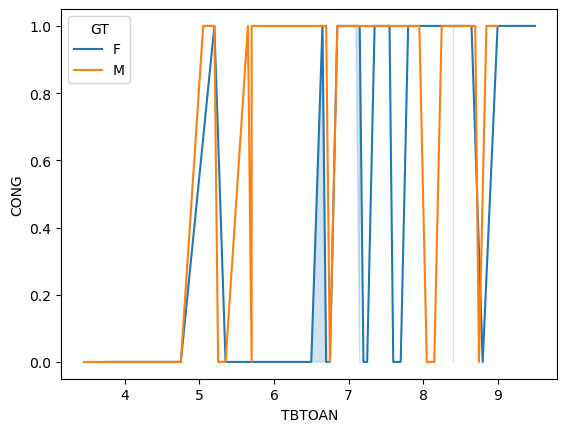

In [40]:
# import seaborn as sns
sns.lineplot(x='TBTOAN', y='CONG', hue='GT' , data=df, estimator = np.max)
plt.show()

 Phần 4: Phân tích mô tả định lượng
 Phân tích định lượng lấy trọng tâm là các biến định lượng
 Mục đích: Mô ta các tri thúc đang ẩn chứa bên trong dữ liệu, thông qua ý nghĩa các đại lượng trong toán học.
 Có 2 nhóm đại lượng mô tả:
 - Đo lường độ tập trung: min, max, mean, median, node, p-phân vị
 - Đo lường độ phân tán: (biến thiên, biến động, hỗn độn, ... nhiều tên) biến động càng cao -> độ ổn định càn thấp và ngược lại
     biến động càng cao -> khó đưa ra quyết định 
     vd: bán món hàng A: khảo sát được giá thị trường xung quanh: 10 , 11, 10, 12, 11 -> độ biến thiên thấp
     những 75, 10, 6, 35, 100 -> độ biến thiên lớn -> khó định giá món hàng chính xác.
     - Ranage: max - min (Ranage càng thấp thì độ biến thiên càng thấp) ranage là một giá trị yếu
     - IQR: Q3- Q1
     - Độ lệch trung bình: d = (tổng độ lệch trung bình - n)
     - phương sai (vaviance): ở xích ma bình phương
     - Độ lệch chuẩn ( ): std = căn bậc 2 của vaviance (std càng thấp thì độ biến thiên càng thấp)
     - Coeficient of variance: cv = xích ma / mean (std/mean)
 B1: Mô tả biến định lượng
     Mô tả sự tập trung (Centraid)
     - min, max
     - mean (nhạy cảm dễ bị ảnh hưởng bởi gía trị bất thường (abnoumal))
         vd: 1, 2, 2, 1, 2 => mean 1.6
             1, 2, 2, 100, 2 => mean = 21.4 => 100 là giá trị bất thường
    - median: (giá trị trung vị) cho biết 50% số pt có giá trị > median và 50% số pt có giá trị < median. Median không bị tác động bởi abnoumal
        vd: 5, 2 , 1, 4, 5
                sort: 1, 2, 4, 5, 5 => 4 là median
            5, 5 , 10, 2, 0, 1.
                sort: 0, 1, 2, 5, 5, 10 => median là mean giữa 2 và 5 là 3.5
    - mode(yếu vị): cho biết đại đa số phần tử có giá trị là bao nhiêu
        vd: 1, 1, 1, 0, 5, 1, 2
        mode: 1
        không bị tác động bởi abnoumal
    - p-phân vị: là các đại luợng chia tập dữ liệu thành các phần bằng nhau có số lượng dự liệu bằng nhau, thường dùng tứ phân vị
        vd: ta có Q1 tới Q2 và Q3
        khoảng từ Q1 tới Q3 là |IQR| = Q3 - Q1 (trừ)
            .........

In [41]:
df['NGONNGU'].describe()
#giải thích ý nghĩa các đại lượng (Thêm variance)

count    100.000000
mean       3.740000
std        1.424408
min        1.000000
25%        2.500000
50%        3.625000
75%        4.750000
max        7.000000
Name: NGONNGU, dtype: float64

như vd trên: 25% là Q1, 50% là Q2 và là median, 75% là Q3
25% đầu 2.5
50% giá trị thông thường xẩy ra trong tập tin là 2.5 -> 4.75
25% cuối 4.75
độ dài |IQR| = 4.75 - 2.5 = 2.25

In [42]:
df['NGONNGU'].mean()

3.74

In [43]:
df['NGONNGU'].median()

3.625

In [44]:
df['NGONNGU'].max()

7.0

In [45]:
df['NGONNGU'].mode()

0    2.0
Name: NGONNGU, dtype: float64

In [46]:
print(f'{df["NGONNGU"].min()} \n {df["NGONNGU"].max()} \n {df["NGONNGU"].median()} \n {df["NGONNGU"].mode()}')
print('in ra Q3')
print(f'{df["NGONNGU"].quantile(0.75)} \n') #0.75 la 75%

1.0 
 7.0 
 3.625 
 0    2.0
Name: NGONNGU, dtype: float64
in ra Q3
4.75 



In [47]:
#các đại lượng đo lường độ biến động
#Ranage
    
df["NGONNGU"].max() - df["NGONNGU"].min()

6.0

In [48]:
#IQR
df["NGONNGU"].quantile(0.75) - df["NGONNGU"].quantile(0.25)

2.25

In [49]:
# Độ lệch trung bình
import numpy as np
np.mean(np.abs(df["NGONNGU"] - np.mean(df["NGONNGU"])))

1.1600000000000001

In [50]:
# Bài tập
# Hãy tính phân vị thứ 9 trong thập phân vị (gọi là p9) cho T5 và T6
# Hãy tính khoảng IQR cho T5 và T6
df[["T5","T6"]].max() - df[["T5","T6"]].min()
# Hãy tính khoảng IQR cho T5 và T6
# Hãy tính độ lệch chuẩn cho T5 và T6

T5    6.5
T6    5.8
dtype: float64

In [51]:
#Độ lệch chuẩn (std)
df['NGONNGU'].std()

1.4244084364884237

In [52]:
#Phương pháp so sánh mức độ biến động của 2 biến số hay nhiều biến số
#vd: hãy so sánh mức độ ổn định của T5 và T6
print(df[['T5','T6']].mean()) #trung bình => 2 gt sấp sỉ mới dùng độ lệch chuẩn
print(df[['T5','T6']].std()) #độ lệch chuẩn
# lưu ý: cần đảm bảo T5, T6 cùng quy chiếu (độ đo đơn vị so sánh) và mean của t5, t6 sấp sỉ nhau
#nếu không sấp sỉ thì dùng cv 

T5    6.717
T6    6.937
dtype: float64
T5    1.478059
T6    1.363200
dtype: float64


In [53]:
#hãy so sánh mức độ biến động của LOGIC và NGONNGU
df[['TOAN','NGONNGU']].std() / df[['TOAN','NGONNGU']].mean() #TOAN Là logiC

TOAN       0.249131
NGONNGU    0.380858
dtype: float64

In [54]:
#Mô tả biến định lượng
    #.........
df['NGONNGU'].describe()

count    100.000000
mean       3.740000
std        1.424408
min        1.000000
25%        2.500000
50%        3.625000
75%        4.750000
max        7.000000
Name: NGONNGU, dtype: float64

In [55]:
df[['NGONNGU', 'TOAN', 'KYNANG']].describe()
#so sánh mức độ ổn định của điểm số
#trong kì thi đánh giá năng lực
#Hãy cho biết mức độ ổn định trong 3 cột điểm
#Gợi ý: 

,NGONNGU,TOAN,KYNANG
count,100.000000,100.000000,100.000000
mean,3.740000,4.255000,4.875000
std,1.424408,1.060053,1.041136
min,1.000000,1.500000,2.750000
25%,2.500000,3.500000,4.250000
50%,3.625000,4.125000,4.750000
75%,4.750000,4.750000,5.500000
max,7.000000,8.000000,8.000000


In [56]:
#Hướng dẫn tính CV
cv = df[['NGONNGU', 'TOAN', 'KYNANG']].std() / df[['NGONNGU', 'TOAN', 'KYNANG']].mean() 
#bt: sinh viên viết code để tìm ra nhúng môn nào có độ biến động ổn định nhất và độ biến thiên cao nhấtnhất

In [57]:
df.groupby('GT')['NGONNGU'].describe()
#Câu hỏi: đánh giá xem nhóm giới tính nào thì tốt hơnhơn

,count,mean,std,min,25%,50%,75%,max
GT,,,,,,,,
F,48.0,3.854167,1.348594,1.25,3.1875,3.75,5.0,7.0
M,52.0,3.634615,1.496288,1.00,2.4375,3.50,4.5,7.0


In [58]:
# F giỏi hơn

In [59]:
#Câu hỏi: sinh viên có giói tính nam thì thi môn nào tốt hơn so với nữ
df.groupby('GT')[['TOAN', 'KYNANG', 'NGONNGU']].describe()

TOAN                                                KYNANG            ...  \
   count      mean       std  min   25%  50%  75%   max  count      mean  ...   
GT                                                                        ...   
F   48.0  4.046875  1.021909  1.5  3.50  4.0  4.5  6.75   48.0  4.906250  ...   
M   52.0  4.447115  1.067956  2.5  3.75  4.5  5.0  8.00   52.0  4.846154  ...   

              NGONNGU                                                    
    75%   max   count      mean       std   min     25%   50%  75%  max  
GT                                                                       
F   5.5  7.25    48.0  3.854167  1.348594  1.25  3.1875  3.75  5.0  7.0  
M   5.5  8.00    52.0  3.634615  1.496288  1.00  2.4375  3.50  4.5  7.0  

[2 rows x 24 columns]

In [60]:
#Toan là môn nam tốt hơn nữ

Historam là biểu đồ mô tả phân phối xác xuất của biến định lượng
Mục đích: cho biết xác xuất xảy ra của biến có trong khoảng giá tị dữ liệu nào nhiều nhất
....

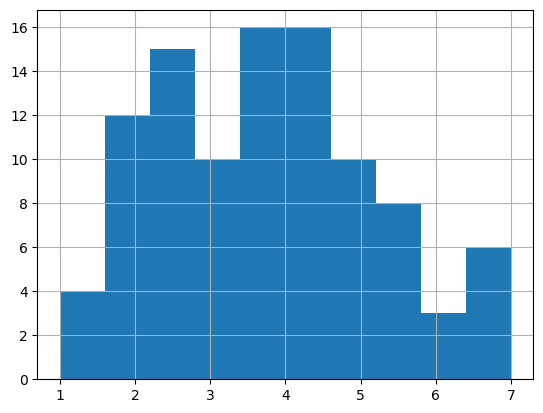

In [61]:
df['NGONNGU'].hist()
plt.show()

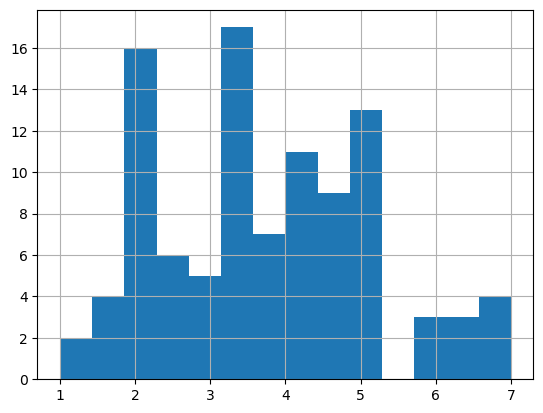

In [62]:
#Hướng dẫn về bins trong historam
#Lưu ý: khi số lượng bins khác nhay sẽ dẫn dến hình dáng khác nhau
df['NGONNGU'].hist(bins=14)
plt.show()

nâng cao hơn histogram, thì ....

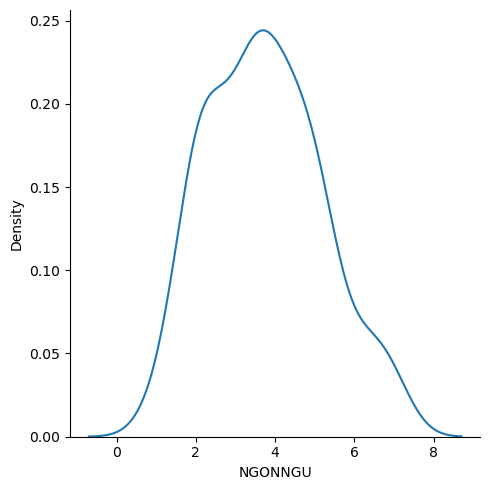

In [63]:
sns.displot(df, x='NGONNGU', kind = 'kde')
plt.show()

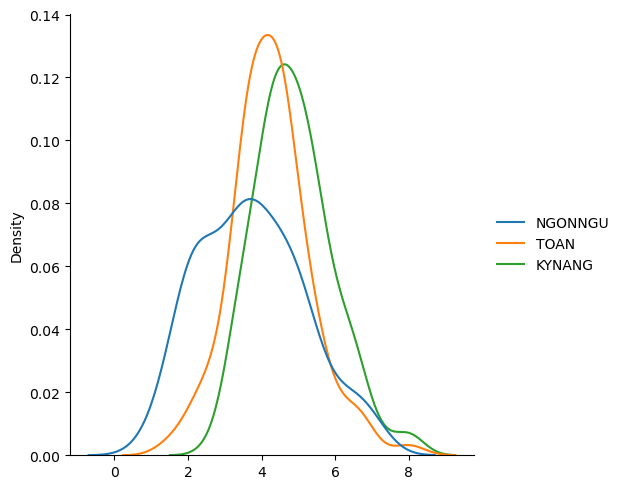

In [64]:
sns.displot(data = df[['NGONNGU','TOAN', 'KYNANG']], kind = 'kde')
plt.show()
#hãy cho biết phân phối nào gần với pp chuẩn hơn

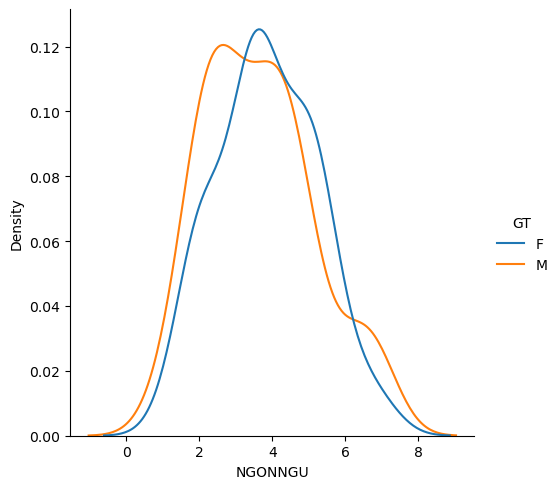

In [65]:
#nhìn đều nhất là phân phối chuẩn => xanh lá, cam

sns.displot(df, x='NGONNGU', hue = 'GT', kind = 'kde')
plt.show()

....
skewness = độ xiên, độ lớn (trị tuyệt đối) cho biết mức đọ dữ liệu lệch nhiều hay ít so với đường cong phân phối chuẩn. cho biết xác suất được phân bổ lệch về phía nào nhiều (lệch về âm thì sắc xuất càng thấp)

trị tuyệt đối giá trị càng lớn thì dữ liệu phân phối nghiên càng nhiều (lệch)

Diễn giải cho skewness
skewness > 0 tức là mean > median: ta gọi là Positive Skewness hay lệch phải, tức là giá trị ngoại biê outliners nhận giá trị lớn sẽ đẩy giá trị trung bình về đuôi
skewness < 0 : mean < median: ta gọi là negative skewness hay lệch trái, tức là giá trị outliners nhận giá trị nhỏ sẽ đẩy giá trị trung bình về phía đầu
skewness = 0: mean = median = mode: phân phối không lệch còn được gọi là phân phối đối xứng

In [66]:
df['NGONNGU'].skew()

0.33322084231625376

In [67]:
df[['NGONNGU', 'TOAN', 'KYNANG']].skew()

#note: khi phân tích dữ liệu với cacs phương pháp có liên quan phần
#nếu dữ liệu quá lệch so với phần chuẩn thì 

NGONNGU    0.333221
TOAN       0.472551
KYNANG     0.607063
dtype: float64

Kurtosis (Pearson Kurtosis): độ nhọn, trị tuyệt đối cho biết mức độ

Giá trị của Kurtosis:
Càng gần 3 thì Fit
dưới 3 thì fat
trên 3 thì thin

thông thường để đánh giá hình dáng độ nhọn ta dùng đại lượng excess kurtosis (còn gọi là Fisher Kurtosis) = Kurtosis - 3
+ Nếu excess > 0 -> thin
+ Nếu excess = 0 -> fit
+ Nếu excess < 0 -> fat

In [68]:
df['NGONNGU'].kurtosis() #=> fat

-0.517003797550498

In [69]:
df[['NGONNGU', 'KYNANG', 'TOAN']].kurtosis()

NGONNGU   -0.517004
KYNANG     0.442173
TOAN       1.372439
dtype: float64

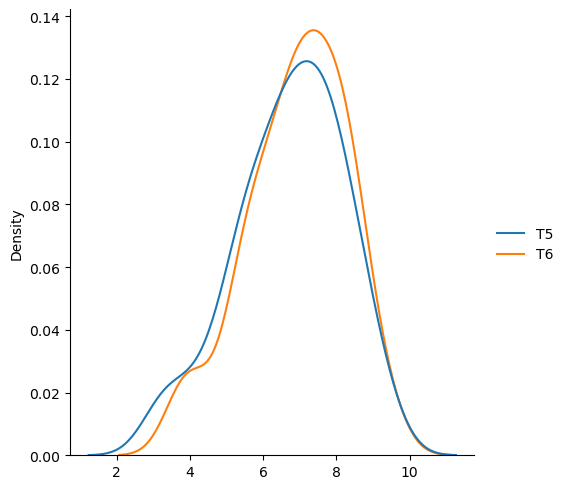

In [70]:
sns.displot(data=df[['T5', 'T6']], kind='kde')
plt.show()

Đây là biểu đồ quan trongj trong phân tích dữ liệu định lượng biểu đồ này cung cáp các thông tin quan trọng như 
1.Q1 Tứ phân vị 25%
2.Q2 Tứ phân vị 50%(median)
3.Q3 Tứ phân vị 75%
4.Đọo lớn IQR = |Q3-Q1|
5.Lower bound = Q1 - 1.5*IQR
6.Upper bound = Q3 + 1.5*IQR
7.Các ngoại biên, bất thường (Outliner) cần xử lí trong dữ lệu 
Outliner: là điểm dữ liệu khác biệt quá nhiều so với đa số
Hướng dẫn
    + Tính khoảng nghi ngờ chưa Outliners


In [71]:
#mô hình là hình t111.png

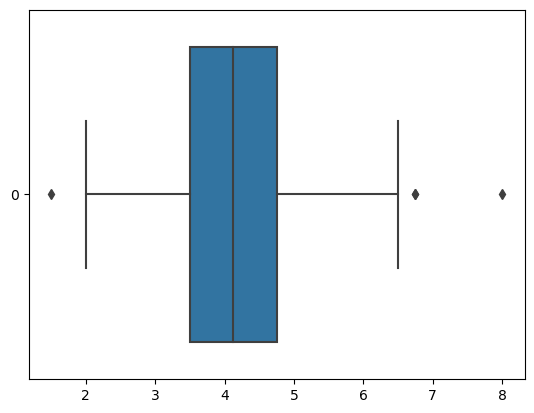

In [72]:
sns.boxplot(data=df['TOAN'], orient='h')
plt.show()
# 3 điểm bất thường 
# q1 khoảng 3.5 q2 khoảng 4.2, q3 khoảng 4.8
# lower bound khoảng 2.2 upper bound khoảng 6.5

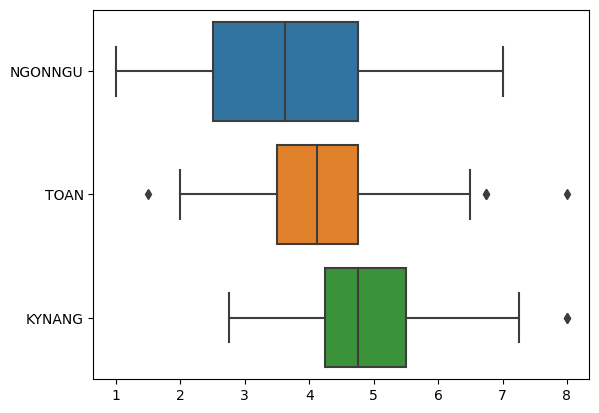

In [73]:
sns.boxplot(data=df[['NGONNGU', 'TOAN', 'KYNANG']], orient='h')
plt.show()

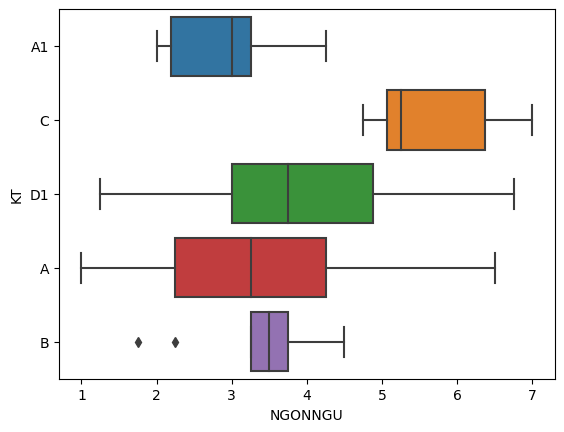

In [74]:
sns.boxplot(x='NGONNGU', y='KT', data=df, orient='h')
plt.show()

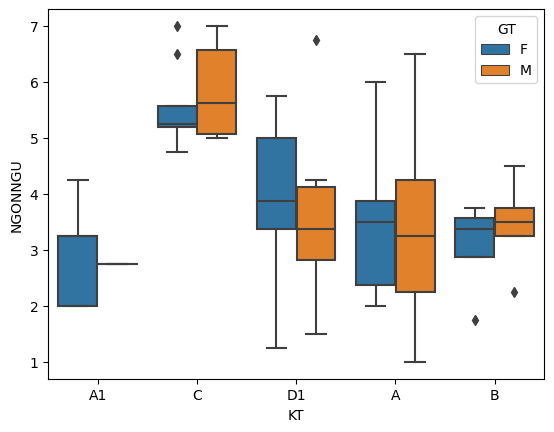

In [75]:
sns.boxplot(x='KT', y='NGONNGU', hue='GT', data=df)
plt.show()

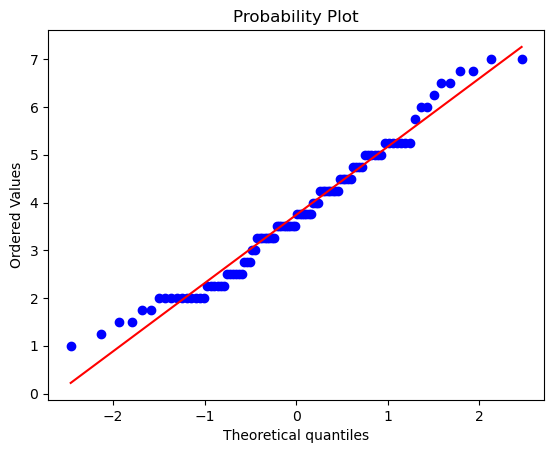

In [76]:
#kiểm định phân phối chuẩn

from scipy import stats
stats.probplot(df['NGONNGU'], plot=sns.mpl.pyplot)
plt.show()

#=> chưa phải phân phối chuản

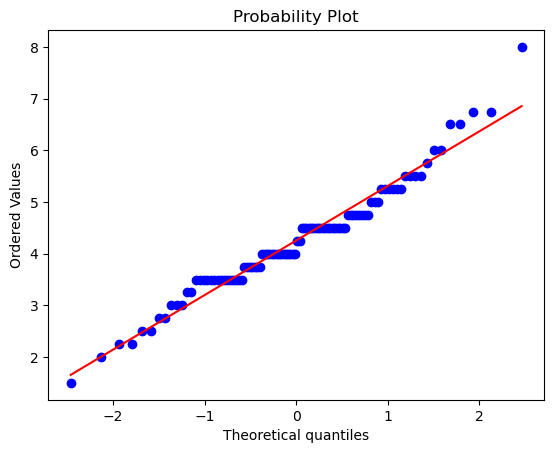

In [77]:
stats.probplot(df['TOAN'], plot=sns.mpl.pyplot)
plt.show()

...
Phân tích sự tác động (ảnh huỏng) qua lại giữa 2 biến định lượng
...
Phương pháp 1: Hiệp phương sai: co-variance
giá trị  co-variance > 0 thì 2 biến có tương quan thuận (động biến)
giá trị  co-variance < 0 thì 2 biến có tương quan nghịch (nghịch biến)
giá trị  co-variance = 0 thì 2 biến không tương quan
Độ lơn (trị tuyệt đối của gía trị) cangf lớn thì mức độ quan hệ (tương quan chắc chẽ)
ma trận hiệp phương sai: co-variance matix
...


In [78]:
df[['T5','T6']].cov()

,T5,T6
T5,2.184658,1.568961
T6,1.568961,1.858314


..
với phương pháp so sánh tương quan bằng co-variance thì ta không đo lường được cường độ tương quan giữa 2 biến định lượng.
Pearson Correlation: Tương quan tuyến tính
r nằm trong khoảng [-1, 1]
r = 0 => không tương quan
r < 0: Tương quan nghịch
r > 0: tương quan thuận
#mức độ
|r| càng gần 1 thì tương quan càng cao
|r| < 0.5: thì tương quan thấp
    [0.5,0.65]: khá
    [0.65,0.75]:tốt
    [0.75,0.9]: rấttốt
    >0.9:hoàn hảo
    
Ma trận tương quan: Corelation matrix

Lưu ý được sử dụng khsảo sát tương quan tuyến tính nhằm phân tích mối quan hệ tuyến tính giữa 2 biến định lượng

In [79]:
df[['T5', 'T6']].corr()

,T5,T6
T5,1.000000,0.778683
T6,0.778683,1.000000


....
Trực quan hóa tương quan tuyến tính giữa 2 biến định lượng khám phá tương quan tuyến tính của 2 biến định lượng thông qua biểu đồ phân tán (Scatter)

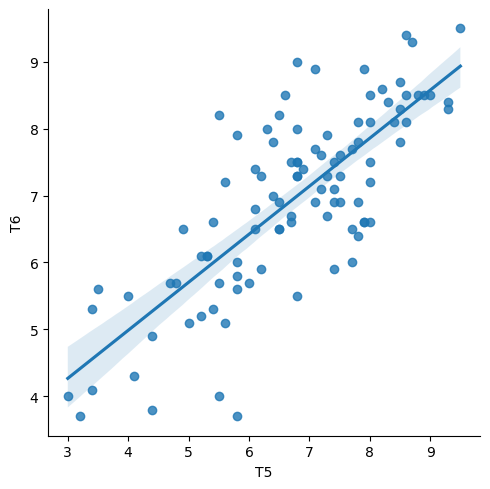

In [80]:
sns.lmplot(data=df, x='T5', y='T6', fit_reg=True)
plt.show()

In [81]:
#tuan5
#...Phân tích suy diễn

# ONE SAMPLE T-TEST
# Mục đích: Kiểm định trung bình của một biến số (định lượng) có bằng một giá trị
# Ho: mean = x

# Với one sample T-test thì giả thiết Ho: muy = 4.0
# Mặc định mức tin cậy là 95% và mức sai lầm là 5%

dfKhoiC = df.loc[df['KT'] == 'C']
import scipy.stats as stats
stats.ttest_1samp(dfKhoiC['TOAN'], popmean=4.0)


TtestResult(statistic=0.44599723713991907, pvalue=0.6629370899710998, df=13)

In [82]:
# TWO SAMPLE T-TEST
# Mục đích: Kiểm tra xem trung bình của 2 biến số (định lượng) có bằng nhau không

In [83]:
# Hãy kiểm tra xem trung bình điểm thi LOGIC và 
# trung bình điểm thi UNGXU của thí sinh thi khối C có bằng nhau không?
# Ho: mean_LOGIC - mean_UNGXU = 0
dfKhoiC = df.loc[df['KT'] == 'C']
stats.ttest_ind(dfKhoiC['TOAN'], dfKhoiC['KYNANG'], equal_var=True)

Ttest_indResult(statistic=-1.0329196014245297, pvalue=0.3111543826061086)

pvalue => chấp nhận => đủ dữ kiện để nói tb logic = ungxu

In [84]:
# Sinh viên làm tương tự:
# Kiểm tra xem trung bình UNGXU có bằng trung bình NGONNGU cho
# thí sinh thi khối C hay không
dfKhoiC = df.loc[df['KT'] == 'C']
stats.ttest_ind(dfKhoiC['KYNANG'], dfKhoiC['NGONNGU'], equal_var=True)

Ttest_indResult(statistic=-2.6321295849540447, pvalue=0.014085909192033959)

pvalue = 0.01 => không đủ dữ kiện để kết luận tb UngXu bằng tb NgonNgu với mức tin cậy = 95%
Lưu ý: với phương pháp one sample t-test, và two sample t-test chỉ sd khi số lượng dữ liệu nhỏ hơn 30
nếu lớn hơn 30 thì dùng pp z-test

In [85]:
# ONE SAMPLE Z-TEST
# Mục đích: Kiểm định trung bình của một biến số (định lượng) có bằng một giá trị

# Ho: mean = x

from statsmodels.stats.weightstats import ztest as ztest
# Hãy kiểm tra xem trung bình điểm toán học kì 2 lớp 12 có bằng 8.0
ztest(df['T6'], value=8.0)
#mắc định aphal = 5%

(-7.797828845339864, 6.298135014120743e-15)

In [86]:
pvalue = 6.298135014120743e-15 => bát bỏ => không đủ dữ kiện để kết luận điểm trung bình toán hk2 lớp 12 bằng 8.0 với mức sai lầm 5%

SyntaxError: cannot assign to literal (1942696267.py, line 1)

In [ ]:
# TWO SAMPLE Z-TEST
# Mục đích: Kiểm tra xem trung bình của 2 biến số (định lượng) có bằng nhau không
# H0 : µ1 = µ2 Both population means are equal.
# Hãy kiểm tra xem điểm trung bình toán học kì 1
# và học kì 2 năm lớp 12 có bằng nhau không
ztest(df['T5'], df['T6'], value=0)

In [ ]:
pvalue = 0.273894207026412 => chấp nhận => đủ dữ kiện để kết luận điểm tb toán hk1 và hk2 lớp 12 bằng nhau với mức sai lầm 5% (mức tin cậy là 95%)

In [ ]:
# Kiểm tra trung bình LOGIC và UNGXU có bằng nhau không
# với mức tin cậy 95%
ztest(df['TOAN'], df['KYNANG'], value=0)

In [ ]:
#bác bỏ => không đủ dữ kiện để kết luận điểm toán bằng Kynang với mức sai lầm 5% (mức tin cậy là 95%)

In [ ]:
# Kiểm định tương quan giữa 2 biến định lượng
# Ho: r = 0
from scipy.stats.stats import pearsonr
# Câu 5: Kiểm tra xem điểm toán học kì 1 và học kì 2 năm lớp 12 có tương quan không?
pearsonr(df['T5'], df['T6'])

statistic=0.7786831657869807 (tương quan mẫu) => tương quan rất mạnh, tương quan thuận
tổng thể => pvalue=1.4846407216274752e-21 (sai lầm 5%) < alpha => bát bỏ
t5, t6 nó có tương quan

với kêt luận trên mẫu t5 và t6 tương quan rất mạnh, tương quan thuận
còn khi tổng thể là chỉ có thể kết luận t5, t6 đủ dữ kiện để kết luận t5, t6 có tương quan

nếu pvalue >5% chấp nhận h0
h0 = 0 => kh tương quan

In [ ]:
# Sinh viên làm tương tự cho T5 và LOGIC có tương quan hay không?
pearsonr(df['T5'], df['TOAN'])

In [ ]:
#trên mấu => thuận, yếu (0.184) mẫu chỉ lấy 100 dữ liệu, còn trên tổng thể có rất nhiều
#tổng thể => không đủ dữ kiện để kết luận t5 và logic tương quan (0.06 = 6% > 5% => chấp nhận h0 => không tương quan)

In [ ]:
# Sinh viên làm tương tự cho T6 và UNGXUcó tương quan hay không?
pearsonr(df['T6'], df['KYNANG'])

In [ ]:
#mẫu = 0.044 => không tương quan
#tổng thể => 0.65 > alpha => chấp nhận => đủ dữ kiện để kết luận t6 và Ungxu có tương quan

In [ ]:
# FISHER TEST
# Mục đích: Kiểm tra sự độc lập của 2 biến định tính dạng nhị phân 2x2
# Ho: Không có sự khác biệt giữa 2 biến định tính => độc lập
import scipy.stats as stats
# Hãy kiểm tra xem có sự phụ thuộc nào giữa việc sinh viên có định hướng nghề nghiệp
# và giới tính khi thí sinh đăng ký dự thi hay không?
crosdata = pd.crosstab(df['GT'], [df['HUONGNGHIEP']], rownames=['GT'], colnames=['HUONGNGHIEP'])
crosdata


In [ ]:
odd_ratio, p_value = stats.fisher_exact(crosdata)
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

pvalue = 0.227 => độc lập
đủ dữ kiện để kết luận rằng việc hướng nghiệp không phụ thuộc vào giới tính

In [ ]:
# Chi-Square TEST
# Mục đích: Kiểm tra sự độc lập của 2 biến định tính
# Ho: Không có sự khác biệt giữa 2 biến định tính
from scipy.stats import chi2_contingency

In [ ]:
# Hãy kiểm tra xem có sự phụ thuộc nào giữa khối thi và khu vực khi đăng ký dự thi hay không
crosdata = pd.crosstab(df['KV'], [df['KT']], rownames=['KV'], colnames=['KT'])
crosdata

In [ ]:
stat, p, dof, expected = chi2_contingency(crosdata)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

pvalue = 0.02 (= 2% < 5%) => phụ thuộc => bát bỏ
=> đủ dữ kiện có sự phụ thuộc giữa khối thi và khu vực thi hay có sự quan hệ giữa khối thi và khu vực thi

In [ ]:

# GT và KT có mối quan hệ hay không?
crosdata = pd.crosstab(df['GT'], [df['KT']], rownames=['GT'], colnames=['KT'])
crosdata
stat, p, dof, expected = chi2_contingency(crosdata)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

pvalue = 0.005 < alpha => bát bỏ
đủ dữ kiện có sự phụ thuộc giữa giới tính và khối thi hay có sự quan hệ giữa khối thi và giới tính

t-test 1 sample
t-test 2 sample
=> biến định lượng < 30

z-test 1 sample
z-test 2 sample
=> biến định lượng > 30

fisher, Chi-Square TEST
=> định tính
fisher => bát bỏ,... (2x2)
Chi-Square => độc lập


In [ ]:
# ONE WAY ANOVA
# KIỂM ĐỊNH ANOVA ONE WAY
# YÊU CẦU:
# 1. BIẾN ĐỊNH LƯỢNG TRÊN NHÓM ĐỊNH TÍNH
# 2. CÁC BIẾN ĐỊNH LƯỢNG TRÊN TỪNG NHÓM THEO PH N PHỐI CHUẨN
# 3. H0: GIÁ TRỊ TRUNG BÌNH DỮ LIỆU ĐỊNH LƯỢNG TRÊN TỪNG NHÓM ĐỊNH TÍNH LÀ BẰNG NHAU
# Điểm toán học kì 2 lớp 12 có phụ thuộc vào giới tính không
#định lượng đi chung với định tính
import statsmodels.api as sm
from statsmodels.formula.api import ols


model = ols('T6 ~ GT', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table


pvalue = 0.363426 > h0 (5%)
h0 ( tb điểm nam = tb điểm nữ ) giả thuyết
=> tb điểm toán hk2 lớp 12 không phụ thuộc vào giới tính

In [ ]:
# Điểm LOGIC có phụ thuộc vào khu vực hay không
model = ols('TOAN ~ KV', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

pvalue = 0.006 < h0 => LOGIC phụ thuộc vô khu vực

In [ ]:


# Điểm UNGXU có phụ thuộc khối thi hay không
model = ols('KYNANG ~ KT', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

pvalue = 0.46 > h0 => Ungxu không phụ thuộc vào khối thi

In [ ]:
# TWO WAY ANOVA
# KIỂM ĐỊNH ANOVA TWO WAY
# YÊU CẦU:
# 1. BIẾN ĐỊNH LƯỢNG
# 2. CÁC BIẾN ĐỊNH LƯỢNG TRÊN TỪNG NHÓM THEO PH N PHỐI CHUẨN
# 3. H0: TRUNG BÌNH CÁC CỘT DỮ LIỆU BẰNG NHAU
#1 định lượng đi chung với 2 định tính

# Hãy cho biết điểm LOGIC có phụ thuộc vào loại GT trên từng nhóm KV hay không
# Performing two-way ANOVA
model = ols('TOAN ~ GT + KV + GT:KV',data=df).fit()
result = sm.stats.anova_lm(model, type=2)
 
# Print the result
print(result)

pvalue = 0.05 => không phụ thuộc logic và GT (độc lập)
pvalue = 0.01 => phụ thuộc logic và kv
pvalue = 0.57 => độc lập trên từng nhóm khu vực xét trên giới tính

...Phân tích hồi quy tuyến tính

Mục tiêu: phân tích tác động hay ảnh hưởng của các biến yếu tố đến biến mục tiêu thường sử dụng cho biến định lượng đay là một kỹ thuật thường được sử dụng trong kt và xh. Trước khi phân tích hồi quy tuyến tính ngta thường vẽ biểu đồ phân tán (Scatter) để khảo sắt sự tương quan.

vd: hãy phân tích sự ảnh hưởng của t5 với t6.
(con đường tốt nhât là đi xây dụng T6 = f(T5)) => t6 là biến phụ thuộc, t5 là biến độc lập
t6 = a0 + a1 +t5 + phần dư (e)

In [ ]:
import statsmodels.api as sm


#adding a constant
X_with_constant = sm.add_constant(df[["T5"]].values)


y = df[['T6']].values


#performing the regression
result = sm.OLS(y, X_with_constant).fit()


# Result of statsmodels
print(result.summary())

những gt cần qtam: model = OLS, R-squared: 0.606, Adj. R-squared:0.602, Prob (F-statistic):1.48e-21
r-squared giải thích được 60% sự biến đổi của t6,
Prob (F-statistic): cho biết mô hình này phù hợp (< alpha(5%))
const: 2.1130 (a0) koqtam alpha
x1: 0.7182 (a1) cần qtam P>|t| = 0.00 < 5% => t5 phù hợp thống kê khi tham gia mô hình
=> t6 = 2.1130 + 0.7182 +t5
giả sử: t5=7.0 => t6=7.1026 (chỉ giải thích được 60%)

In [ ]:
# Phân tích tác động của T5, T6 đến điểm LOGIC dựa trên mô hình hồi quy tuyến tính
# Cho biết nếu T5 = 6.0 và T6 = 5.5 thì dự đoán học sinh đi thi sẽ được điểm LOGIC là nhiêu
logic = f(t5,t6)
= a0 + a1+ t5 + a2 + t6 + e

In [ ]:
X_with_constant = sm.add_constant(df[["T5", "T6"]].values)


y = df[['TOAN']].values


#performing the regression
result = sm.OLS(y, X_with_constant).fit()


# Result of statsmodels
print(result.summary())

 LOGIC = 2.7072 - 0.0913 + T5 + 0.3115 + T6 
 giả sử: T5 = 6.0 và T6 = 5.5 => logic = 4 